In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm

In [2]:
loan_df = pd.read_excel("loan.xlsx")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df['LoanAmount_log'] = np.log(loan_df['LoanAmount'])
loan_df                             

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


<Axes: xlabel='LoanAmount_log', ylabel='Count'>

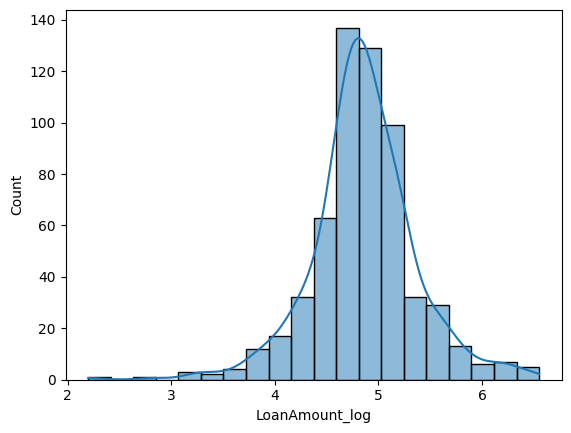

In [6]:
sns.histplot(data = loan_df, x='LoanAmount_log', bins =20, kde= True)

In [7]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [8]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['TotalIncome_log']  = np.log(loan_df['TotalIncome'])
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


<Axes: xlabel='TotalIncome_log', ylabel='Count'>

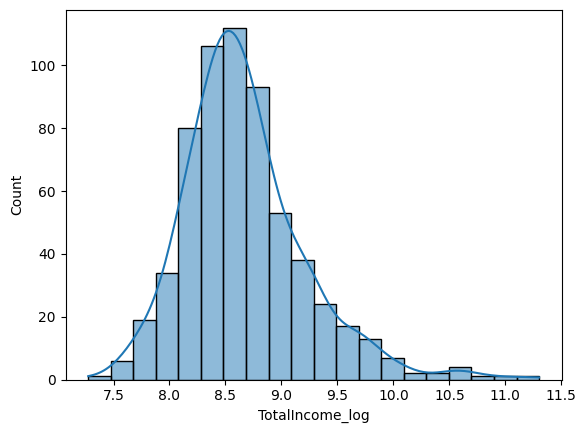

In [9]:
sns.histplot(data = loan_df, x='TotalIncome_log', bins =20, kde= True)

# Missing Data Handling

In [10]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace =True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace =True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace =True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace =True)

loan_df.LoanAmount = loan_df.LoanAmount.fillna(loan_df.LoanAmount.mean())
loan_df.LoanAmount_log = loan_df.LoanAmount_log.fillna(loan_df.LoanAmount_log.mean())

loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0],inplace =True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0],inplace =True)
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [11]:
#Selecting rows and columns through concating (iloc)
x = loan_df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = loan_df.iloc[:,12].values
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [12]:
print("Percentage of missing gender is %2f%%" %((loan_df['Gender'].isnull().sum()/loan_df.shape[0])*100))

Percentage of missing gender is 0.000000%


In [13]:
print("Number of people who take loan according to gender")
gender_count = loan_df['Gender'].value_counts()
Gender_df = pd.DataFrame({'Gender': gender_count.index, 'Count': gender_count.values})
Gender_df


Number of people who take loan according to gender


,Gender,Count
0,Male,502
1,Female,112


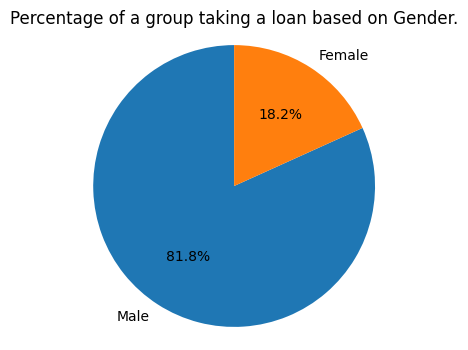

In [45]:
plt.figure(figsize=(4, 4))
plt.pie(Gender_df['Count'], labels=Gender_df['Gender'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of a group taking a loan based on Gender.')
plt.axis('equal')
plt.show()

In [15]:
print("Number of people who take loan according to gender")
marr_count = loan_df['Married'].value_counts()
marr_df = pd.DataFrame({'Marital_status': marr_count.index, 'Count': marr_count.values})
marr_df

Number of people who take loan according to gender


,Marital_status,Count
0,Yes,401
1,No,213


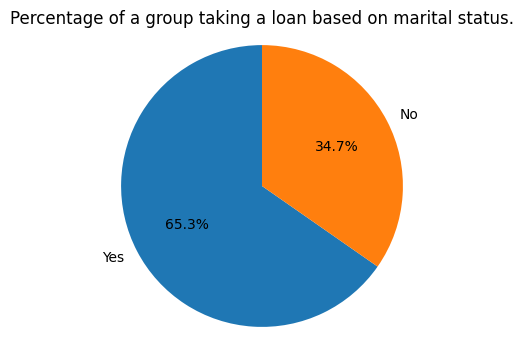

In [44]:
plt.figure(figsize=(4, 4))
plt.pie(marr_df['Count'], labels=marr_df['Marital_status'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of a group taking a loan based on marital status')
plt.axis('equal')
plt.show()

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64


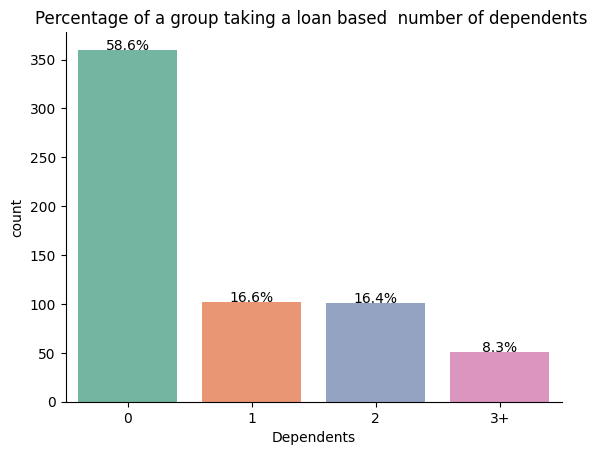

In [43]:
dependents_percentage = (loan_df['Dependents'].value_counts(normalize=True) * 100)

print(dependents_percentage)

sns.countplot(data=loan_df, x='Dependents', palette='Set2')

import matplotlib.pyplot as plt

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/loan_df.shape[0]*100:.1f}%',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='baseline', fontsize=10, color='black')
plt.title('Percentage of a group taking a loan based  number of dependents ')
sns.despine()
plt.show()


No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64


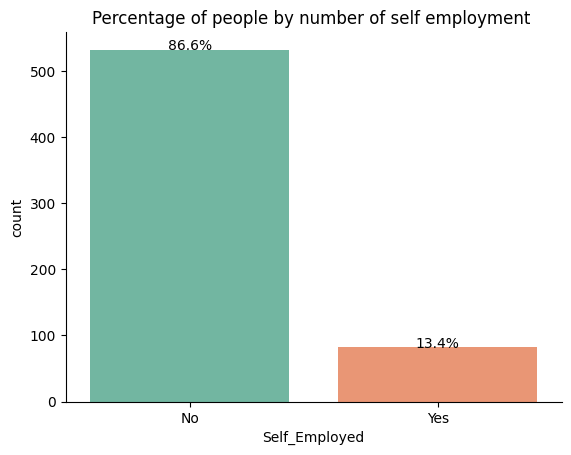

In [18]:
selfemployment_percentage = (loan_df['Self_Employed'].value_counts(normalize=True) * 100)

print(selfemployment_percentage)

sns.countplot(data=loan_df, x='Self_Employed', palette='Set2')

import matplotlib.pyplot as plt

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/loan_df.shape[0]*100:.1f}%',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='baseline', fontsize=10, color='black')
plt.title('Percentage of a group taking a loan based on self-employment status')
sns.despine()
plt.show()

146.412162    3.583062
120.000000    3.257329
110.000000    2.768730
100.000000    2.442997
160.000000    1.954397
                ...   
240.000000    0.162866
214.000000    0.162866
59.000000     0.162866
166.000000    0.162866
253.000000    0.162866
Name: LoanAmount, Length: 204, dtype: float64


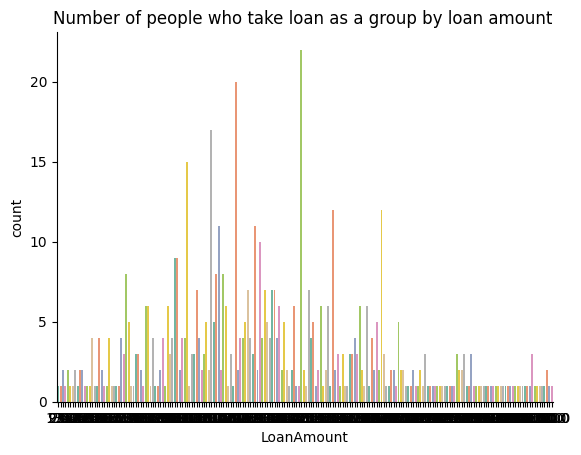

In [19]:
Loanamount_percentage = (loan_df['LoanAmount'].value_counts(normalize=True) * 100)

print(Loanamount_percentage)

sns.countplot(data=loan_df, x='LoanAmount', palette='Set2')

plt.title('Number of people who take loan as a group by loan amount ')
sns.despine()
plt.show()

1.0    85.504886
0.0    14.495114
Name: Credit_History, dtype: float64


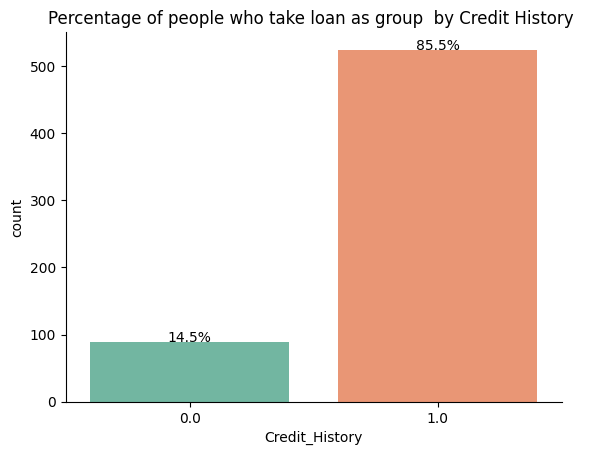

In [20]:
credithistory_percentage = (loan_df['Credit_History'].value_counts(normalize=True) * 100)

print(credithistory_percentage)

sns.countplot(data=loan_df, x='Credit_History', palette='Set2')

import matplotlib.pyplot as plt

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/loan_df.shape[0]*100:.1f}%',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='baseline', fontsize=10, color='black')
plt.title('Percentage of people who take loan as group  by Credit History ')
sns.despine()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [22]:

for i in range(0, 5):
    X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i].astype(str))  


X_train[:, 7] = Labelencoder_x.fit_transform(X_train[:, 7].astype(str))

X_train                                   

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 333],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 17],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 315],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 431],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 339],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 368]], dtype=object)

In [23]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [24]:
for i in range (0,5):
    X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,1])
    X_test[:,7] = Labelencoder_x.fit_transform(X_test[:,7])
X_test

array([[0, 0, 0, 0, 0, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 0, 1.0, 4.718498871295094, 28],
       [1, 1, 1, 1, 1, 1.0, 5.780743515792329, 104],
       [1, 1, 1, 1, 1, 1.0, 4.700480365792417, 80],
       [1, 1, 1, 1, 1, 1.0, 4.574710978503383, 22],
       [1, 1, 1, 1, 1, 0.0, 5.10594547390058, 70],
       [1, 1, 1, 1, 1, 1.0, 5.056245805348308, 77],
       [0, 0, 0, 0, 0, 1.0, 6.003887067106539, 114],
       [0, 0, 0, 0, 0, 0.0, 4.820281565605037, 53],
       [1, 1, 1, 1, 1, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 0, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 1, 1, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 0, 1.0, 5.634789603169249, 96],
       [1, 1, 1, 1, 1, 1.0, 5.4638318050256105, 97],
       [1, 1, 1, 1, 1, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 1, 1, 1.0, 4.204692619390966, 22],
       [0, 0, 0, 0, 0, 1.0, 5.247024072160486, 32],
       [0, 0, 0, 0, 0, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 0, 1.0, 4.532599493153256, 1],
       [1, 1

In [25]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print("accuracy of random forest clf is", metrics.accuracy_score(y_pred,y_test))
y_pred

accuracy of random forest clf is 0.7398373983739838


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [30]:
y_pred = nb_clf.predict(X_test)
print('accuracy of nave bayes is ', metrics.accuracy_score(y_pred,y_test))

accuracy of nave bayes is  0.8292682926829268


In [31]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = dt_clf.predict(X_test)
print('accuracy of DecisionTree  is ', metrics.accuracy_score(y_pred,y_test))

accuracy of DecisionTree  is  0.6504065040650406


In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred = kn_clf.predict(X_test)
print('accuracy of KN  is ', metrics.accuracy_score(y_pred,y_test))

accuracy of KN  is  0.8130081300813008


In [37]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

**Nave Bayes has the highest accuracy prediction of 82%**